# **Table of Content**

1. *Import the modules.*

2. *Loading the dataset.*

3. *Reading the dataset.*

4. *Meta Information of the dataframe.*

5. *Basics Cleaning and Statistics.*

6. *Divide the categorical & numerical features.*

7. *Finding the missing values.*

8. *Finding the duplicate records.*

9. *Finding the Outliers.*

10. *Checking correlation.*

11. *Univariate Analysis.*

12. *Bivariate Analysis.*

13. *Checking the multicollinearity.*

14. *Corelation between the features.*

15. *Split the dataset into train and test.*

16. *Model creation.*

17. *Evaluate the model.*

18. *Conclusion.*

### **Importing Modules**

In [1]:
# Exploratory Data Analysis Libraries

# Important libraries....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....

# Visualization of the data....
from matplotlib import pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from collections import Counter 

# Machine Learning libraries



### **Loading Dataset**

In [2]:
# Importing opendatsets library to download dataset from kaggle

import opendatasets as ods
ods.download('https://www.kaggle.com/datasets/mohansacharya/graduate-admissions')

Skipping, found downloaded files in ".\graduate-admissions" (use force=True to force download)


### **Reading Dataset**

In [3]:
data_file = "X:\Internship\INTERNSAVY-s_TASK\Task-1\graduate-admissions\Admission_Predict_Ver1.1.csv"
data = pd.read_csv(data_file)

### **Meta Information of Dataset**

In [4]:
data.shape

(500, 9)

> Dataset contain 500 rows and 9 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


> No missing values

> statement_of_proof(SOP), letter_of_recommendation(LOR), CGPA, Chance_of_Admit(Taret Variable) are **float data type** rest all are **integer data type**

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

> There are some **trailing spaces** in the column names

### **Basic Cleaning and Statistical Analysis**

In [7]:
# remove all trailing spaces in column names
data.columns = data.columns.str.strip()

In [8]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [9]:
# removing unwanted columns
data.drop('Serial No.', axis=1, inplace=True)

In [28]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
# Statistical Analysis
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


> The **GRE Score** ranges from 290 to 340, with an average (mean) score of approximately 316.47. The scores seem to be relatively normally distributed, as indicated by the small standard deviation (11.30).

> The **TOEFL Score** ranges from 92 to 120, with an average score of around 107.19. Similar to GRE, the TOEFL scores also appear to have a roughly normal distribution.

> **University Rating** ranges from 1 to 5, with an average rating of approximately 3.11. This is a categorical variable representing the university's rating, and it seems to have a skewed distribution, with more universities falling in the middle ratings.

> **SOP (Statement of Purpose)** and **LOR (Letter of Recommendation)** scores have values ranging from 1 to 5. Both SOP and LOR have average scores of about 3.37 and 3.48, respectively. These variables also seem to have somewhat normal distributions.

> **CGPA** ranges from 6.80 to 9.92, with an average CGPA of approximately 8.58. CGPA has a relatively narrow spread, as indicated by the small standard deviation (0.60). It appears to be normally distributed as well.

> **Research** is a binary variable (0 or 1) representing whether an applicant has research experience. About 56% of the applicants have research experience.

> The **Chance of Admit(target variable)** ranges from 0.34 to 0.97, with an average chance of admission being approximately 0.72. This variable represents the likelihood of an applicant being admitted, and it also appears to have a relatively normal distribution.

### **Categorical & Numerical Features**

In [12]:
# Discreate numerical features
discreate_num_col = [feature for feature in data.columns if data[feature].dtype == 'int64']
print("Discreate numerical features in dataset are: ", discreate_num_col)

Discreate numerical features in dataset are:  ['GRE Score', 'TOEFL Score', 'University Rating', 'Research']


In [13]:
# Continuous numerical features
continuous_num_col = [feature for feature in data.columns if data[feature].dtype == 'float64']
print("continuous numerical features in dataset are: ", continuous_num_col)

continuous numerical features in dataset are:  ['SOP', 'LOR', 'CGPA', 'Chance of Admit']


In [14]:
# Categorical features
categorical_col = [feature for feature in data.columns if data[feature].dtype == 'o']
print("categorical_col features in dataset are: ", categorical_col)

categorical_col features in dataset are:  []


> Since **University rating** and **Research** both are categorical data. Although categorical feature has object data type but in this data it is already converted into numerical which will be helpful for training the model.

### **Checking Missing values**

In [15]:
# creating the function
def checking_missing_value(df):
    """Take the dataframe and return number of missing values and its % value in each column of dataframe"""
    missing_values = data.isnull().sum()
    perc_missing_value = (data.isnull().sum()/data.isnull().count())*100
    return pd.concat([missing_values, perc_missing_value], keys= ["Missing_values", "% Missing Values"], axis=1)

#calling the function
checking_missing_value(data)

,Missing_values,% Missing Values
GRE Score,0,0.0
TOEFL Score,0,0.0
University Rating,0,0.0
SOP,0,0.0
LOR,0,0.0
CGPA,0,0.0
Research,0,0.0
Chance of Admit,0,0.0


> No missing values

### **Checking Duplicate Records**

In [16]:
data.duplicated().value_counts()

False    500
dtype: int64

> No duplicated record found in dataset

### **Checking Outliers**

In [17]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# calling the function   
outliers_to_drop= detect_outliers(data,2,['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research'])


In [18]:
# detecting outliers row in dataset
data.loc[outliers_to_drop]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


> No impactfull Outliers found

### **Saving the clean dataset**

In [166]:
# Assuming you have already loaded and preprocessed the data
# Replace 'path_to_save_cleaned_data.csv' with the desired file path
cleaned_data_file = 'X:\Internship\INTERNSAVY-s_TASK\Task-1\graduate-admissions\clean_data.csv'
data.to_csv(cleaned_data_file, index=False)

print("Cleaned dataset has been saved to:", cleaned_data_file)

Cleaned dataset has been saved to: X:\Internship\INTERNSAVY-s_TASK\Task-1\graduate-admissions\clean_data.csv


### **Checking Correlation**

In [19]:
# calculating correlation
corr_df= data.corr()
corr_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


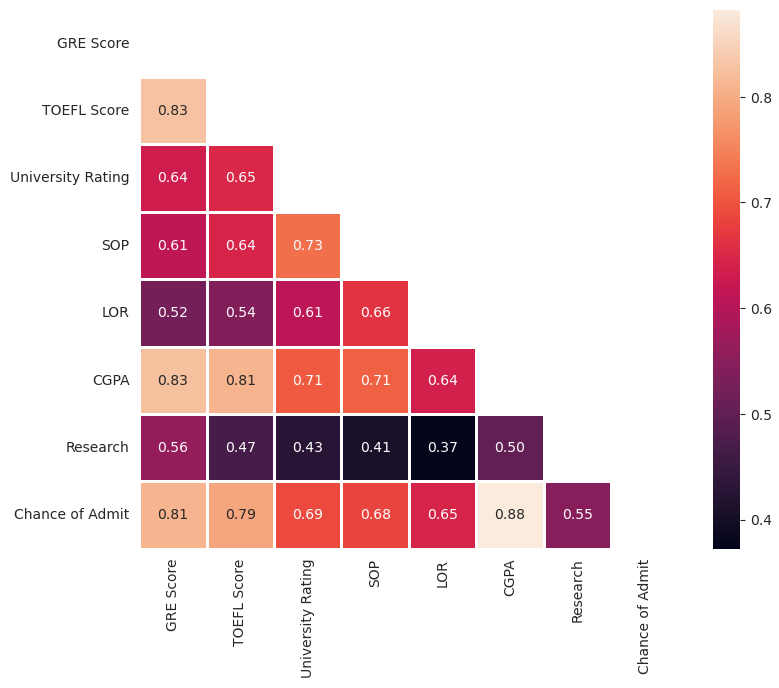

In [20]:
# seeing correlation visually
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr_df, mask=mask, square=True, annot=True, fmt='0.2f', linewidths=.8, color = 'orange')

> *Conclusion*

> **CGPA** seems to be a critical factor in the admission process, as it has the highest mean value among the numerical variables. A higher CGPA is associated with a higher chance of admission.

> **GRE Score and TOEFL Score** also play important roles, as indicated by their respective mean values. Higher scores in these exams are positively correlated with higher chances of admission.

> The average **University Rating** is around 3.11, and it could also have an impact on the chances of admission, with higher-rated universities potentially having higher admission standards.

> Around 56% of the applicants have **research** experience. It is worth investigating how having research experience affects the chances of admission and whether it interacts with other factors such as university rating or CGPA.

### **Univariate Analysis**

**Analyzing 'Chance of Admit'**

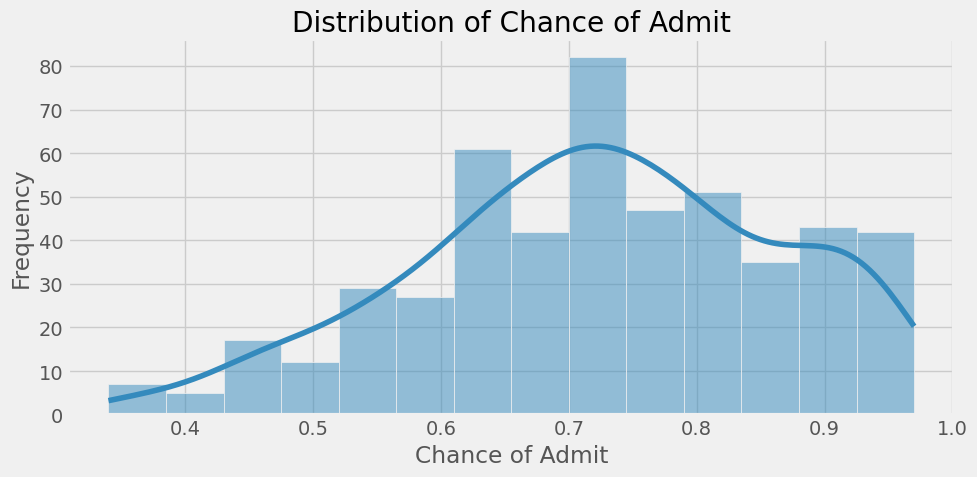

In [40]:
# Let's start with analyzing the target variable 'Chance of Admit'
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
sns.histplot(data['Chance of Admit'], kde=True)
plt.title("Distribution of Chance of Admit")
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

> **Insights:-** By analyzing the distribution of Chance Of Admit, we can say that highest percentage of the student getting admission at the university is between "0.6" & "1.0".

---

**Density distribution of TOEFL and GRE score**

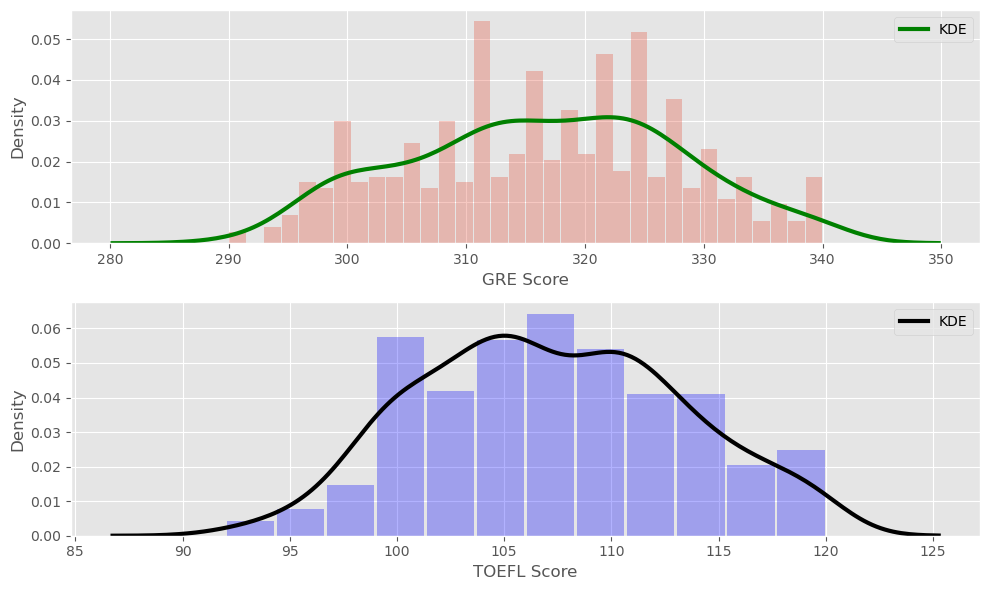

In [21]:
plt.style.use("ggplot")
plt.figure(figsize=(10,6))


plt.subplot(2, 1, 1)
sns.distplot(data['GRE Score'], bins=34, kde_kws={ "color": "g", "lw": 3, "label": "KDE"}, hist_kws={"linewidth": 2,"alpha": 0.3, "rwidth":0.95 }, )
plt.legend()

plt.subplot(2, 1, 2)
sns.distplot(data['TOEFL Score'], bins=12, color='Blue', kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"linewidth": 7,"alpha": 0.3, "rwidth":0.95 })
plt.legend()

plt.tight_layout()
plt.show()

> **Insights:-** By analyzing the distribution of GREScore, we can say that most number of the students scored "312" & "324" in GRE and highest GREScore of students is between "304" & "330".

> **Insights:-** By analyzing the distribution of TOEFL Score, we can say that most number of the students scored is "110" & "105" in TOEFL and highest TOEFLScore of students is between "99" & "115".

---

**University Rating**

In [22]:
# grouping and fetching only count as per university rating 
UR_df= data.groupby(['University Rating']).count().iloc[:, :1].rename({'GRE Score': 'Count'}, axis=1)
UR_df

,Count
University Rating,
1,34
2,126
3,162
4,105
5,73


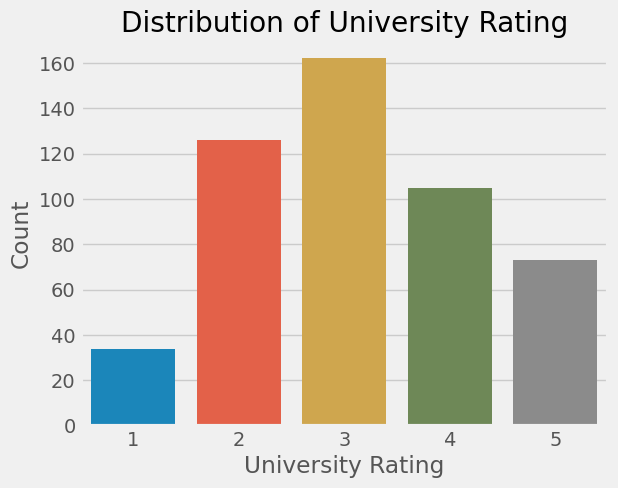

In [47]:
# plotting to see the distribution visually
plt.style.use("fivethirtyeight")
sns.barplot(x=UR_df.index, y=UR_df["Count"])
plt.tight_layout()
plt.xlabel("University Rating")
plt.ylabel("Count")
plt.title("Distribution of University Rating")
plt.show()

> **Insights:-** By analyzing the distribution of University Rating, we can say that most students are from **University rating is "2" & "3"**

---

**Analyzing Research**

In [24]:
# grouping and fetching only count as per Research 
Research_df= data['Research'].value_counts().to_frame().reset_index().rename({"index":"research", "Research":"count"}, axis=1)

Research_df.replace({'research': {1: "Yes", 0: "No"}}, inplace=True)
Research_df

,research,count
0,Yes,280
1,No,220


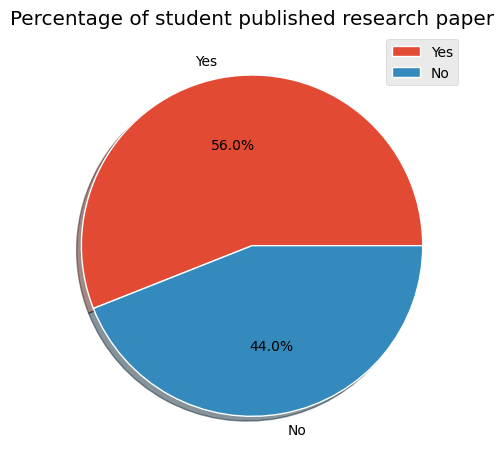

In [43]:
# plotting to see the distribution visually
plt.style.use("ggplot")
plt.pie(x=Research_df['count'], labels=Research_df['research'], autopct="%1.1f%%", shadow=True, wedgeprops={"linewidth": 1, "edgecolor": "white"} )
plt.title("Percentage of student published research paper")
plt.tight_layout()
plt.legend()
plt.show()


> **Insights:-** By analyzing the distribution of *Research*, we can say that most number of the students have published Research i.e. "1".

---

**Analyzing CGPA**

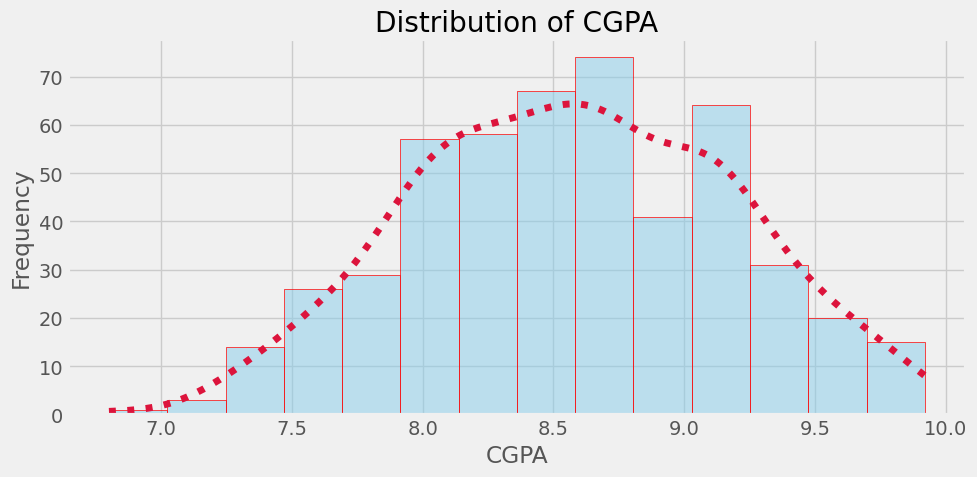

In [75]:
plt.figure(figsize=(10, 5))
ax=sns.histplot(data['CGPA'],color='skyblue', edgecolor='red',line_kws={ 'lw': 5, 'ls': ':'} , kde=True)
ax.lines[0].set_color('crimson')
plt.title("Distribution of CGPA")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

---

**Analyzing SOP**

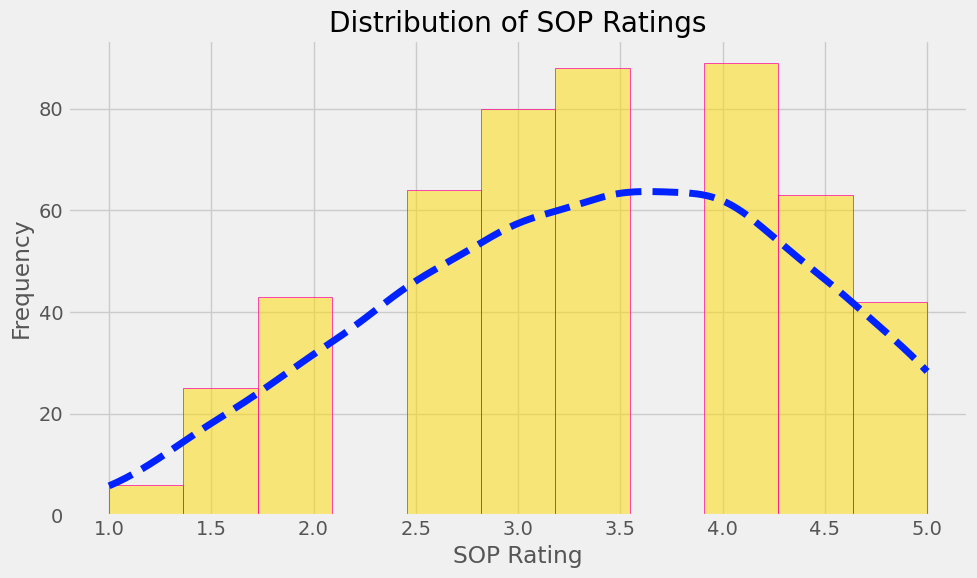

In [108]:
# SOP

plt.figure(figsize=(10, 6))
ax=sns.histplot(data['SOP'], color='#FFDD00', edgecolor= '#FF00A1', line_kws={'lw':'5', 'ls':'--'}, kde=True)
ax.lines[0].set_color('#0022FF')
plt.title("Distribution of SOP Ratings")
plt.xlabel("SOP Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

> **Insights:-** By analyzing the distribution of SOP, we can say that highest number of the Statement of purpose is between "2.5" & "4.5"

---

**Analyzing LOR**

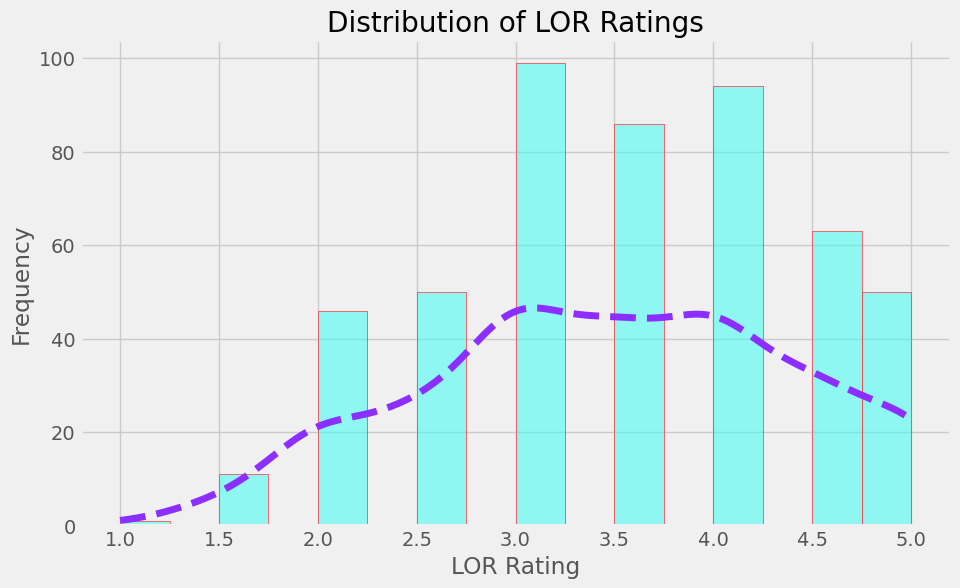

In [105]:
# LOR
plt.figure(figsize=(10, 6))
ax= sns.histplot(data['LOR'],color='#2EFFF5', edgecolor='#FF2E39',line_kws={'lw':'5', 'ls':'--'}, kde=True)
ax.lines[0].set_color('#8C2EFF')
plt.title("Distribution of LOR Ratings")
plt.xlabel("LOR Rating")
plt.ylabel("Frequency")
sns.color_palette("rocket", as_cmap=True)
plt.show()

> **Insights:-** By analyzing the distribution of LOR, we can say that highest number of the Letter of recommendation (LOR) is between "2.5" & "4.5".

===

*******

===

### **Bivariate Analysis**

**GRE Score VS Chance of Admit**

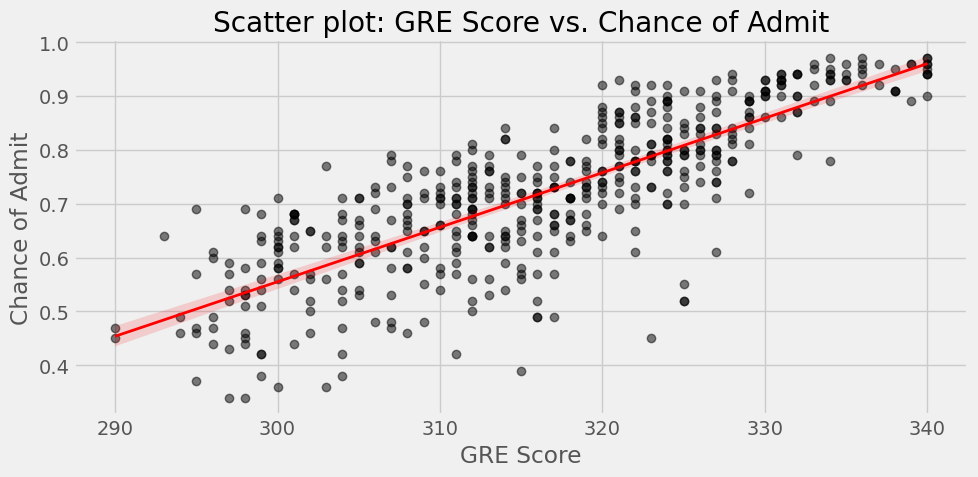

In [143]:
# To understand the relationship between the target variable and GRE Score
plt.figure(figsize=(10, 5))
sns.regplot(x='GRE Score', y='Chance of Admit',ci=95, scatter_kws = {"color": "black", "alpha": 0.5}, line_kws={'color':'red','lw':2} , data=data)
plt.title("Scatter plot: GRE Score vs. Chance of Admit")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.tight_layout()
plt.show()

> **Insights:-** 1) There is a strong positive relationship between GREScore and ChanceOfAdmit.
                 
>   2) Mostly higher chance of admit means higher GRE score  

---

**TOEFL Score VS Chance of Admit**

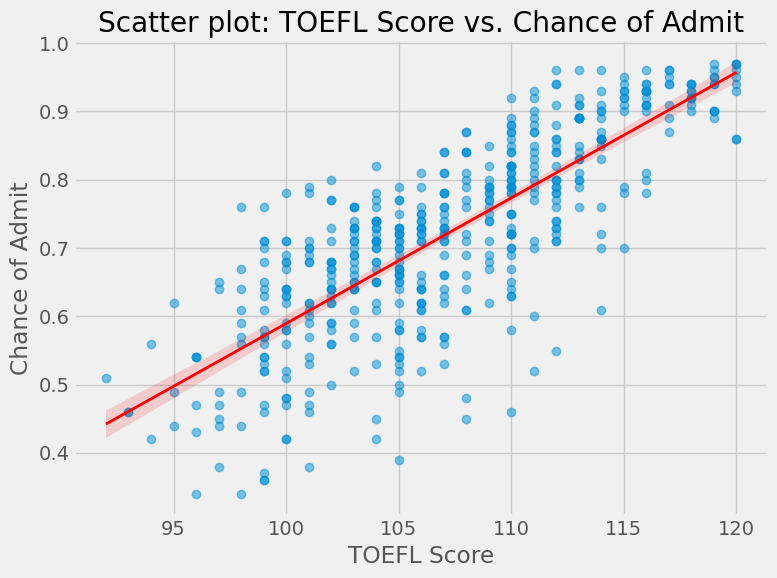

In [149]:
plt.figure(figsize=(8, 6))
sns.regplot(x='TOEFL Score', y='Chance of Admit', ci=95, scatter_kws = {"alpha": 0.5}, line_kws={'color':'red','lw':2}, data=data)
plt.title("Scatter plot: TOEFL Score vs. Chance of Admit")
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.tight_layout()
plt.show()

> **Insights:-** There is a strong positive relationship between TOEFLScore and ChanceOfAdmit

---

**University rating VS Chance of Admit**

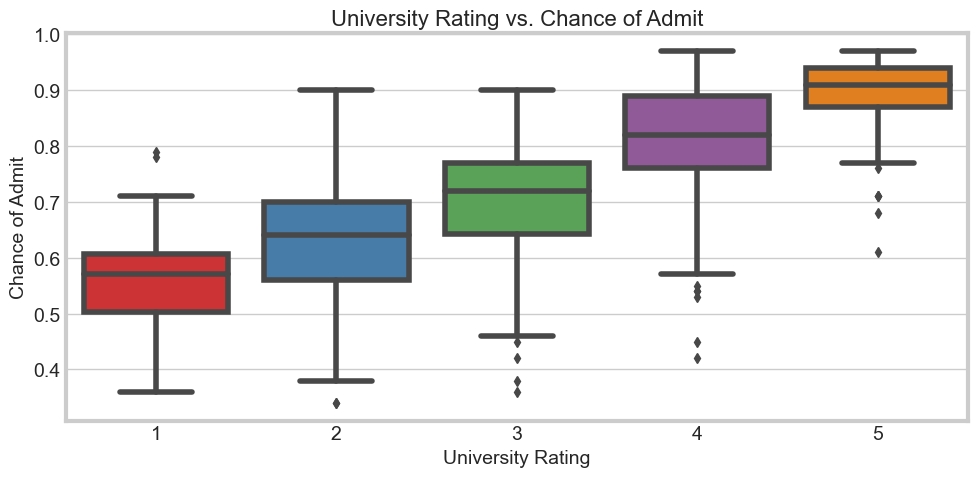

In [164]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

# Box plot
sns.boxplot(x='University Rating', y='Chance of Admit', data=data, palette='Set1')

# Customizing the plot
plt.title("University Rating vs. Chance of Admit", fontsize=16)
plt.xlabel("University Rating", fontsize=14)
plt.ylabel("Chance of Admit", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

> **Insights:-** We cant see any relationship between *University Rating* and *Chance Of Admit*.

===

---

===